# Import, loading data and understand the problem 🚤

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import shap
tf.__version__

'2.9.1'

In [2]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [3]:
y = df.pop("target")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 30.9+ KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [6]:
conversion_thal = {"fixed":1, "normal":2, "reversible":3}
df["thal"].unique()

array(['fixed', 'normal', 'reversible', '1', '2'], dtype=object)

In [7]:

df["thal"]= df["thal"].map(conversion_thal)

categorical_features = np.where(df[list(df.columns)].dtypes != float)[0]
categorical_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11])

Ici on fait le choix de ne garder uniquement les valeurs numériques identifiés.

In [24]:
list_numerical = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']

X = df[list_numerical]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                     random_state=0)
 

In [30]:
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train)
X_test[list_numerical] = scaler.transform(X_test)

# Building the model 

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [34]:
model.compile(optimizer="adam", 
              loss ="binary_crossentropy", 
              metrics=["accuracy"])

In [36]:
model.fit(X_train[list_numerical], y_train, 
         epochs=10, 
         batch_size=13,
         validation_data=(X_test, y_test)
         )

Epoch 1/10
17/17 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.8208 - val_loss: 0.4273 - val_accuracy: 0.8022
Epoch 2/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8208 - val_loss: 0.4277 - val_accuracy: 0.8022
Epoch 3/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8160 - val_loss: 0.4279 - val_accuracy: 0.7912
Epoch 4/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8208 - val_loss: 0.4287 - val_accuracy: 0.8022
Epoch 5/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8160 - val_loss: 0.4292 - val_accuracy: 0.8022
Epoch 6/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8208 - val_loss: 0.4295 - val_accuracy: 0.7802
Epoch 7/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8208 - val_loss: 0.4295 - val_accuracy: 0.7912
Epoch 8/10
17/17 [==

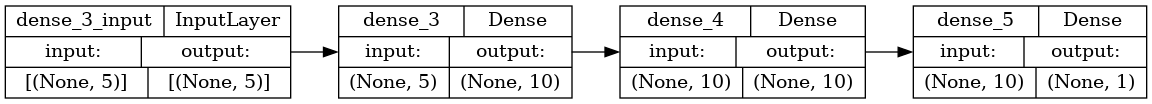

In [37]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [38]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Accuracy", accuracy)

3/3 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7912
Accuracy 0.791208803653717


In [39]:
model.save('classifier_hd')
reloaded_model = tf.keras.models.load_model('classifier_hd')

INFO:tensorflow:Assets written to: classifier_hd/assets


In [40]:
predictions = reloaded_model.predict(X_train)
print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)

7/7 [==============================] - 0s 979us/step
This particular patient had a 49.0 percent probability of having a heart disease, as evaluated by our model.


# SHAP 

We use our model and a selection of 50 samples from the dataset to represent typicalf feature values , (the so called background distribution)

In [41]:
explainer = shap.KernelExplainer(model, X_train.iloc[:50,:])

Now we use 500 perterbation samples to estimate the SHAP values for a given prediction (at index location 20). Note that this requires 500 * 50 evaluations of the model.

In [42]:
shap_values = explainer.shap_values(X_train.iloc[20,:], nsamples=500)

In [43]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[20,:])

## Explain many predictions

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature’s responsibility for a change in the model output, the plot below represents the change in the dependent variable. Vertical dispersion at a single value of represents interaction effects with other features.

In [45]:
shap_values50 = explainer.shap_values(X_train.iloc[50:100,:], nsamples=500)

  0%|          | 0/50 [00:00<?, ?it/s]

In [46]:
shap.force_plot(explainer.expected_value, shap_values50[0], X_train.iloc[50:100,:])

In [60]:
shap_values = explainer.shap_values(X_train, nsamples=500)
np.shape(shap_values[0])

  0%|          | 0/212 [00:00<?, ?it/s]

(212, 5)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


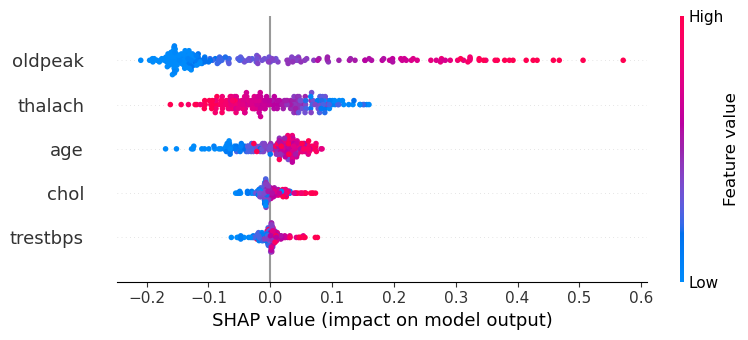

In [61]:
shap.summary_plot(shap_values[0], X_train)

# Catboost

In [ ]:
from catboost import CatBoostClassifier
